# Préparation des données

Importation des librairies

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

Importer le fichier CSV

In [2]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [3]:
data = pd.read_csv("/content/gdrive/MyDrive/Projet_IA/data.csv", sep=";")
data = pd.DataFrame(data)

Préparation des données

In [4]:
# ça nous avance pas bcp
data.drop('Num_Acc', inplace=True, axis=1)
data.drop('id_usa', inplace=True, axis=1)
data.drop('date', inplace=True, axis=1)
# sinon ça marche po
data.drop('num_veh', inplace=True, axis=1)
data.drop('ville', inplace=True, axis=1)
data.drop('id_code_insee', inplace=True, axis=1)
data.drop('descr_cat_veh', inplace=True, axis=1)
data.drop('descr_agglo', inplace=True, axis=1)
data.drop('descr_athmo', inplace=True, axis=1)
data.drop('descr_lum', inplace=True, axis=1)
data.drop('descr_etat_surf', inplace=True, axis=1)
data.drop('description_intersection', inplace=True, axis=1)
data.drop('descr_dispo_secu', inplace=True, axis=1)
data.drop('descr_grav', inplace=True, axis=1)
data.drop('descr_motif_traj', inplace=True, axis=1)
data.drop('descr_type_col', inplace=True, axis=1)
data.drop('dept', inplace=True, axis=1)
data.drop('region', inplace=True, axis=1)
data.drop('CODE_REG', inplace=True, axis=1)

In [5]:
print(data.head())

    latitude  longitude  an_nais  age  place  weight  gravity  month  days  \
0  47.487718  -1.216426     1969   40      1    7500        0      1    14   
1  45.595814   5.655880     1959   50      1    2000        0      1     6   
2  45.595814   5.655880     1960   49      1    1240        0      1     6   
3  42.793565   3.002079     1957   52      1    1240        0      1    31   
4  45.970826   0.050529     1951   58      1    1240        0      2    18   

   weeks  hours  athmo_num  etat_surf_num  lum_num  collision_num  \
0      2      8          6              7        1              1   
1      1     11          5              5        0              1   
2      1     17          5              5        0              1   
3      4     20          4              6        4              1   
4      7     17          0              0        0              1   

   intersection_num  motif_num  agglo_num  
0                 2          5          1  
1                 2         

In [6]:
from sklearn import *

#data = data.groupby("gravity").apply(lambda x: x.sample(frac=0.1))

x, y = data.drop(columns=["gravity"]), data.gravity

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

from sklearn.metrics import confusion_matrix

# PCA

Analayse en Composante Principale

In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['athmo_num', 'etat_surf_num', 'lum_num', 'weight', 'age']
x = data.loc[:, features].values
y = data.loc[:,['gravity']].values

scaler = StandardScaler()
x = scaler.fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_reduit = pca.fit_transform(x)

principalDf = pd.DataFrame(data = x_reduit, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data[['gravity']]], axis = 1)

Visualisation

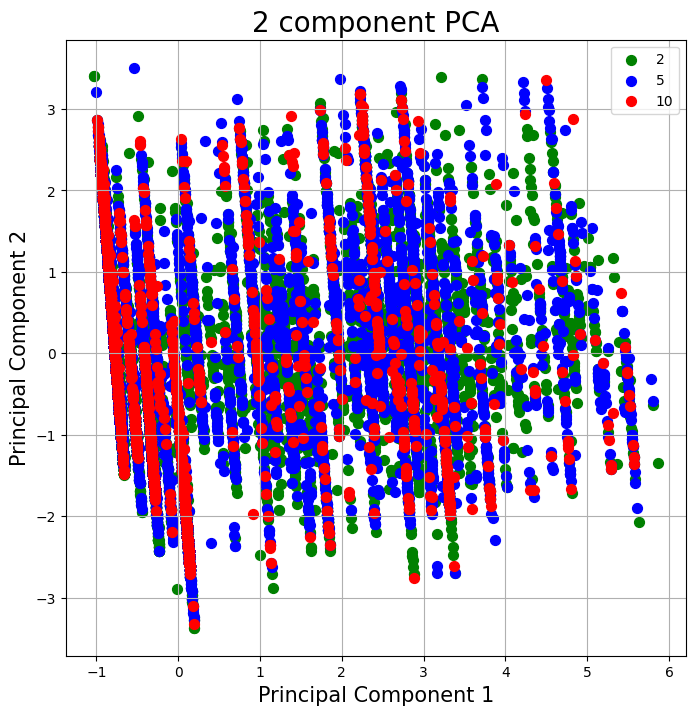

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [2, 5, 10]
colors = ['g', 'b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['gravity'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Support Vector Machine

In [7]:
from sklearn import svm

Détermination des paramètres optimaux

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [1, 10],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}

scaler = StandardScaler()
x = scaler.fit_transform(x)

svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train, y_train)

#score d’échantillons bien classifiés sur le jeu de données de test
print(clf.score(x_test, y_test)," ",clf.best_params_)

0.5389733840304183


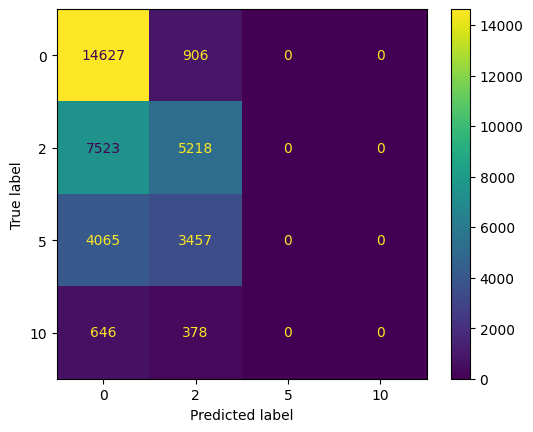

In [8]:
svc = svm.SVC(C=10,kernel='rbf',gamma='scale')
svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)

#score d’échantillons bien classifiés sur le jeu de données de test
score_svc = accuracy_score(y_test, svc_pred)
print(score_svc)

cm = confusion_matrix(y_test, svc_pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()

# Random forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

Détermination des paramètres optimaux

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_features': ['sqrt'],
    'max_depth': [None],
    'n_estimators': [200, 1000, 2000]
}

raf = RandomForestClassifier()
clf = GridSearchCV(raf, parameters)
clf.fit(x_train, y_train)

#score d’échantillons bien classifiés sur le jeu de données de test
print(clf.score(x_test, y_test)," ",clf.best_params_)

0.5966865833785986   {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 1000}


In [ ]:
raf = RandomForestClassifier(max_depth=None, max_features='sqrt',n_estimators=1000)
raf.fit(x_train, y_train)

raf_pred = raf.predict(x_test)

#score d’échantillons bien classifiés sur le jeu de données de test
score_raf = accuracy_score(y_test, raf_pred)
print(score_raf)

cm = confusion_matrix(y_test, raf_pred, labels=raf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=raf.classes_)
disp.plot()

# Multilayer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

Détermination des paramètres optimaux

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'hidden_layer_sizes' : [150,100,50],
}

mlp = MLPClassifier()
clf = GridSearchCV(per, parameters)
clf.fit(x_train, y_train)

#score d’échantillons bien classifiés sur le jeu de données de test
print(clf.score(x_test, y_test)," ",clf.best_params_)

0.5439978272677892   {'hidden_layer_sizes': 50}


0.38701792504073873


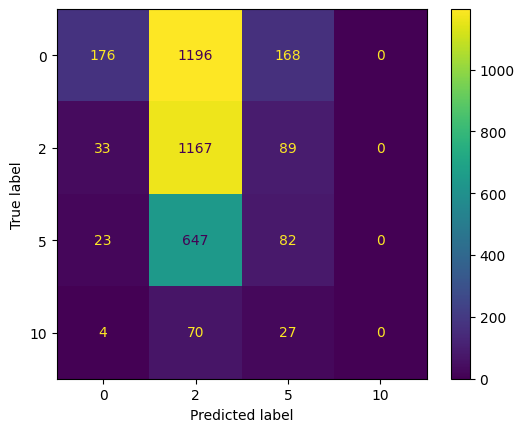

In [ ]:
mlp = MLPClassifier()
mlp.fit(x_train, y_train)

mlp_pred = mlp.predict(x_test)

#score d’échantillons bien classifiés sur le jeu de données de test
score_mlp = accuracy_score(y_test, mlp_pred)
print(score_mlp)

cm = confusion_matrix(y_test, mlp_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()

# Comparaison des modèles

In [ ]:
score_max = max([score_svc, score_raf, score_per])
if score_max == score_svc:
  print("Le meilleur modèle est Support Vector Machine")
elif score_max == score_raf:
  print("Le meilleur modèle est Random Forest")
else:
  print("Le meilleur modèle est Multilayer Perceptron")
print(score_max,"% des prédictions sont bonnes")

Le meilleur modèle est Random Forest
0.5983161325366648 % des prédictions sont bonnes
